In [2]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import statsmodels.formula.api as smf
from sklearn.metrics import log_loss
from sklearn import discriminant_analysis, neighbors
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures



colors = ["cornflowerblue", "indianred", "darkseagreen", "plum", "dimgray"]

## DataFrame

In [3]:
df= pd.read_csv('alzheimers_disease_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

### NAN's

In [4]:
df.isna().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

No hay NAN's

## Limpieza de Datos

In [5]:
df= df.drop(columns=['PatientID','DoctorInCharge'])
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,...,6.045039,0,0,0.014691,0,0,1,1,0,0


## Dummies

In [6]:
df=pd.get_dummies(df, columns=['Ethnicity','EducationLevel'])

In [7]:
df.groupby('Diagnosis').mean()

,Age,Gender,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,...,DifficultyCompletingTasks,Forgetfulness,Ethnicity_0,Ethnicity_1,Ethnicity_2,Ethnicity_3,EducationLevel_0,EducationLevel_1,EducationLevel_2,EducationLevel_3
Diagnosis,,,,,,,,,,,,,,,,,,,,,
0,74.945284,0.514039,27.515092,0.290137,10.071880,4.90764,4.974839,7.124832,0.262779,0.136069,...,0.156228,0.301656,0.586753,0.221742,0.087833,0.103672,0.195824,0.397408,0.301656,0.105112
1,74.842105,0.492105,27.912670,0.285526,9.980156,4.94316,5.026581,6.916292,0.232895,0.159211,...,0.163158,0.301316,0.609211,0.192105,0.110526,0.088158,0.228947,0.397368,0.285526,0.088158


## Target y CrossValidation

In [8]:
target = 'Diagnosis'
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = linear_model.LogisticRegression().fit(X_train, y_train)

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Regresión Logistica

In [9]:
model = linear_model.LogisticRegression().fit(X_train, y_train)
probabilidades_modelo1 = model.predict_proba(X_test)[:, 1]

c:\Users\ppmel\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
def calibracion(probabilidades, y, bins):
    df_calibracion = pd.DataFrame({
        'probabilidades':probabilidades,
        'y':y
    })
    df_calibracion['bins'] = pd.qcut(df_calibracion['probabilidades'], q=bins, labels=False)+1
    grouped = df_calibracion.groupby('bins').mean()

    plt.plot(grouped.probabilidades, grouped.y, label="Modelo", marker="o")
    plt.plot(grouped.probabilidades, grouped.probabilidades, label="Real", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("probabilidades")
    plt.ylabel("Real")

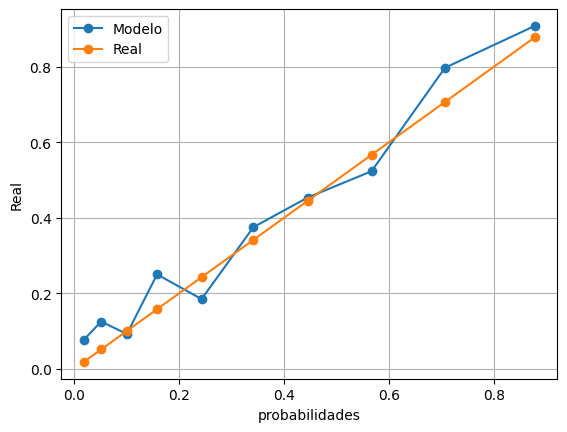

In [11]:
calibracion(probabilidades_modelo1, y_test, 10)

### Polinomica 2

In [12]:
pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('poly_features', PolynomialFeatures(degree=2)),
     ('model', linear_model.LogisticRegression(penalty='l2'))
])

pipeline.fit(X_train, y_train)
probabilidades_modelo2 = pipeline.predict_proba(X_test)[:, 1]

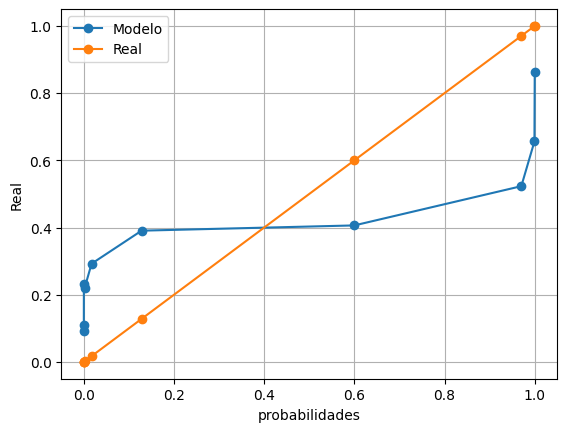

In [13]:
calibracion(probabilidades_modelo2, y_test, 10)

### Polinomica 3

In [14]:
pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('poly_features', PolynomialFeatures(degree=3)),
     ('model', linear_model.LogisticRegression(penalty='l2'))
])

pipeline.fit(X_train, y_train)
probabilidades_modelo3 = pipeline.predict_proba(X_test)[:, 1]

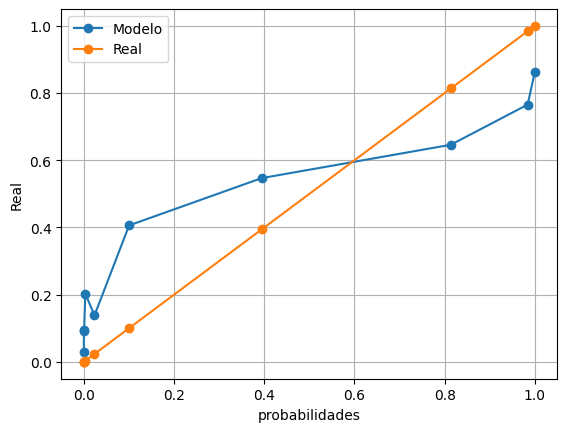

In [15]:
calibracion(probabilidades_modelo3, y_test, 10)

### Discriminante Lineal

In [16]:
pipeline = Pipeline([
     ('scaler', StandardScaler()),
     ('model', discriminant_analysis.LinearDiscriminantAnalysis())
])

pipeline.fit(X_train, y_train)
probabilidades_modelo_disc = pipeline.predict_proba(X_test)[:, 1]

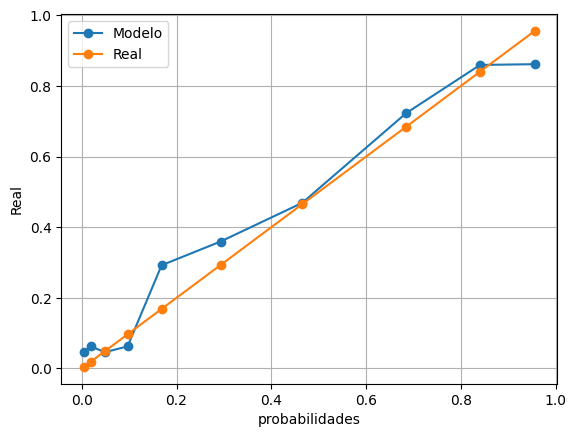

In [17]:
calibracion(probabilidades_modelo_disc, y_test, 10)

In [18]:
juntos = pd.DataFrame({
     'real': y_test,
     'logistica1': probabilidades_modelo1,
     'logistica2': probabilidades_modelo2,
     'logistica3': probabilidades_modelo3,
     'probabilidades_disc': probabilidades_modelo_disc
})

juntos.head()

,real,logistica1,logistica2,logistica3,probabilidades_disc
1159,0,0.059444,5.366521e-12,3.892839e-07,0.013735
1822,0,0.475409,6.732656e-06,3.066921e-02,0.153149
978,0,0.124138,3.920769e-01,1.371309e-01,0.159469
759,0,0.351133,2.267312e-05,6.655720e-06,0.078635
874,0,0.004863,2.225047e-11,1.449967e-09,0.001993


In [19]:
bins = 10
juntos['bins_log1'] = pd.qcut(juntos['logistica1'], bins, labels=False) + 1
juntos['bins_log2'] = pd.qcut(juntos['logistica2'], bins, labels=False) + 1
juntos['bins_log3'] = pd.qcut(juntos['logistica3'], bins, labels=False) + 1
juntos['bins_disc'] = pd.qcut(juntos['probabilidades_disc'], bins, labels=False) + 1

# Agrupaciones
grouped_log1 = juntos.groupby('bins_log1').mean()
grouped_log2 = juntos.groupby('bins_log2').mean()
grouped_log3 = juntos.groupby('bins_log3').mean()
grouped_disc = juntos.groupby('bins_disc').mean()

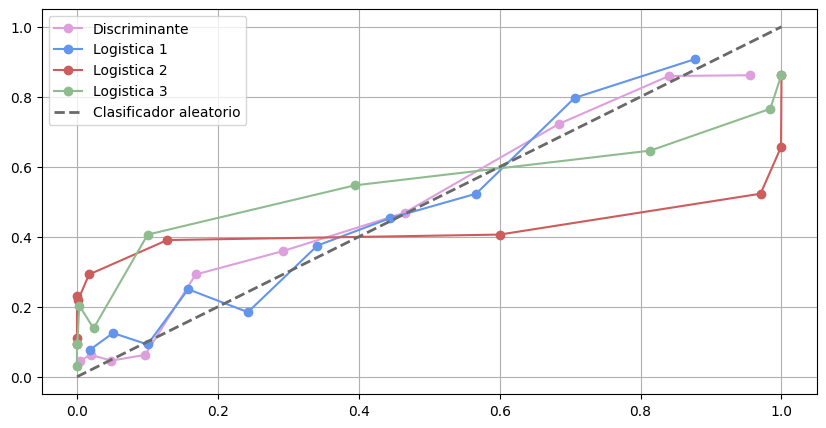

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(grouped_disc.probabilidades_disc, grouped_disc.real, marker='o', label='Discriminante', color=colors[3])
plt.plot(grouped_log1.logistica1, grouped_log1.real, marker='o', label='Logistica 1', color=colors[0])
plt.plot(grouped_log2.logistica2, grouped_log2.real, marker='o', label='Logistica 2', color=colors[1])
plt.plot(grouped_log3.logistica3, grouped_log3.real, marker='o', label='Logistica 3', color=colors[2])
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, label='Clasificador aleatorio', color=colors[-1])
plt.legend()
plt.grid()

In [21]:
print('Modelo Logístico: ',log_loss(y_pred=juntos.logistica1, y_true=juntos.real))
print('Modelo Polinomico 2: ',log_loss(y_pred=juntos.logistica2, y_true=juntos.real))
print('Modelo Polinomico 3: ',log_loss(y_pred=juntos.logistica3, y_true=juntos.real))
print('Modelo discriminante: ',log_loss(y_pred=juntos.probabilidades_disc, y_true=juntos.real))

Modelo Logístico:  0.5019177666781709
Modelo Polinomico 2:  1.6089053378359357
Modelo Polinomico 3:  0.8765807982120649
Modelo discriminante:  0.43606848594365516


### Regresión Logística

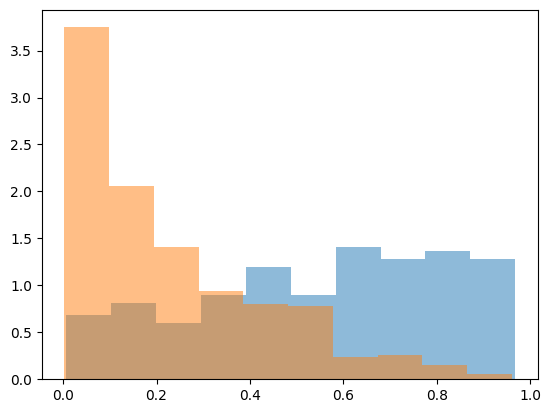

In [22]:
plt.hist(juntos[juntos.real == 1].logistica1, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logistica1, density=True, alpha=0.5, bins=10)
plt.show()

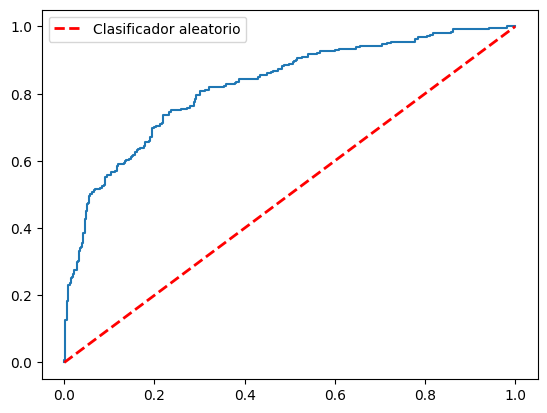

In [23]:
from sklearn.metrics import roc_curve

fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo1, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

In [24]:
print('AUC: ',roc_auc_score(y_score= probabilidades_modelo1, y_true=y_test))

AUC:  0.8232492539143943


### Polinomial  Grado 2

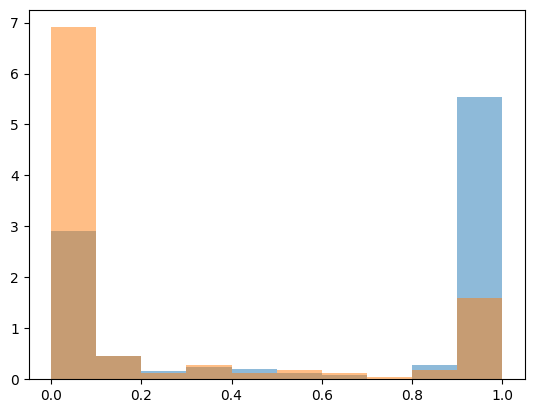

In [25]:
plt.hist(juntos[juntos.real == 1].logistica2, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logistica2, density=True, alpha=0.5, bins=10)
plt.show()

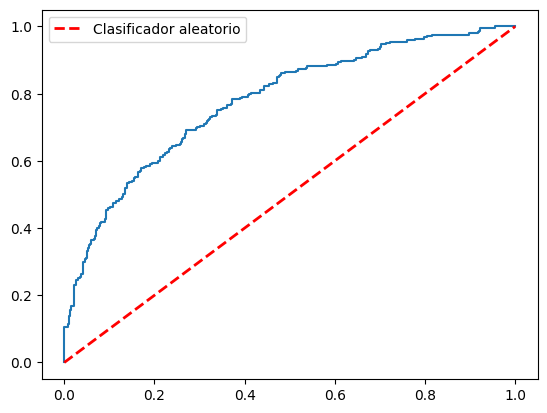

In [26]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo2, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

In [27]:
print('AUC: ',roc_auc_score(y_score= probabilidades_modelo2, y_true=y_test))

AUC:  0.7774416417971464


### Polinomial  Grado 3

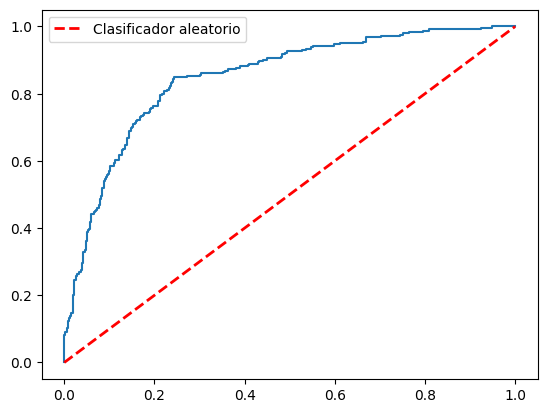

In [28]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo3, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

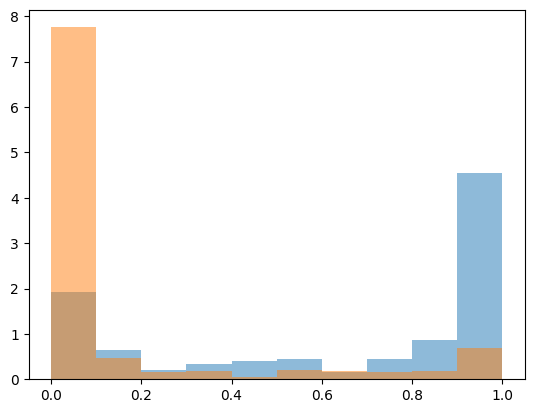

In [29]:
plt.hist(juntos[juntos.real == 1].logistica3, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].logistica3, density=True, alpha=0.5, bins=10)
plt.show()

In [30]:
print('AUC: ',roc_auc_score(y_score= probabilidades_modelo3, y_true=y_test))

AUC:  0.8480336045133069


### Discriminante Lineal

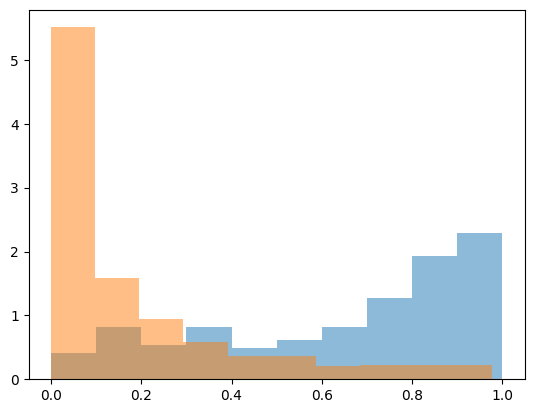

In [31]:
plt.hist(juntos[juntos.real == 1].probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.hist(juntos[juntos.real == 0].probabilidades_disc, density=True, alpha=0.5, bins=10)
plt.show()

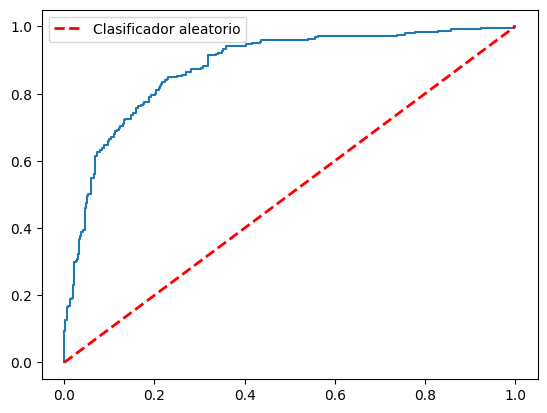

In [32]:
fpr, fnp, scores = roc_curve(y_score=probabilidades_modelo_disc, y_true=y_test)
plt.plot(fpr, fnp)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Clasificador aleatorio')
plt.legend()

In [33]:
print('AUC: ',roc_auc_score(y_score= probabilidades_modelo_disc, y_true=y_test))

AUC:  0.8795327255631412


### AUC | KNN

Optimo nn: 37
AUC: 0.531861943501901


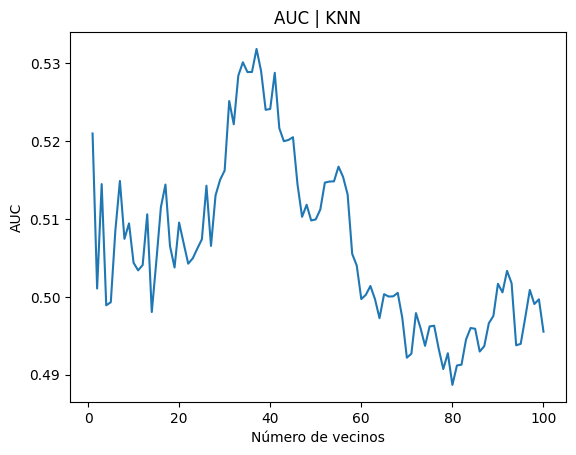

In [40]:
from sklearn import neighbors
from sklearn.metrics import roc_auc_score

vecinos = []
auc = []
for i in range(1, 101):
    model = neighbors.KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    probabilidades = model.predict_proba(X_test)[:, 1]
    vecinos.append(i)
    auc.append(roc_auc_score(y_score=probabilidades, y_true=y_test))

mejor_vecino = vecinos[auc.index(max(auc))]
mejor_auc = max(auc)

plt.plot(vecinos, auc)
plt.xlabel("Número de vecinos")
plt.ylabel("AUC")
plt.title("AUC | KNN")

print(f"Optimo nn: {mejor_vecino}")
print(f"AUC: {mejor_auc}")


## Conclusiones 

Evaluamos varios modelos de clasificación para predecir el diagnóstico de Alzheimer.

Análisis discriminante lineal (AUC = 0.8795) fue el modelo más efectivo.
Regresión logística (AUC = 0.8232) mostró buen desempeño, con mejoras en la versión polinómica de grado 3 (AUC = 0.8480).
KNN tuvo el peor desempeño, con su mejor AUC en 0.5318 usando 37 vecinos.
En general, los modelos lineales y polinómicos fueron más adecuados, destacando el analisis discriminante como la mejor opción.
